In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

1. Dataset 확인

In [0]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
list(df_train)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [5]:
list(df_test)

['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

1.1 Null Data Check

In [9]:
for col in df_train.columns:
  msg = 'column: {:>13}\t Perceent of Nan Value: {:.2f}'.format(col, 100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
  print(msg)

column:   PassengerId	 Perceent of Nan Value: 0.00
column:      Survived	 Perceent of Nan Value: 0.00
column:        Pclass	 Perceent of Nan Value: 0.00
column:          Name	 Perceent of Nan Value: 0.00
column:           Sex	 Perceent of Nan Value: 0.00
column:           Age	 Perceent of Nan Value: 19.87
column:         SibSp	 Perceent of Nan Value: 0.00
column:         Parch	 Perceent of Nan Value: 0.00
column:        Ticket	 Perceent of Nan Value: 0.00
column:          Fare	 Perceent of Nan Value: 0.00
column:         Cabin	 Perceent of Nan Value: 77.10
column:      Embarked	 Perceent of Nan Value: 0.22


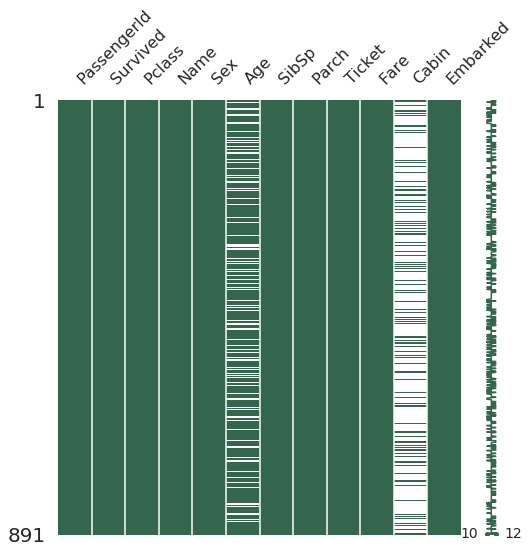

In [11]:
msno.matrix(df=df_train.iloc[:,:], figsize=(8,8), color=(0.2, 0.4, 0.3))

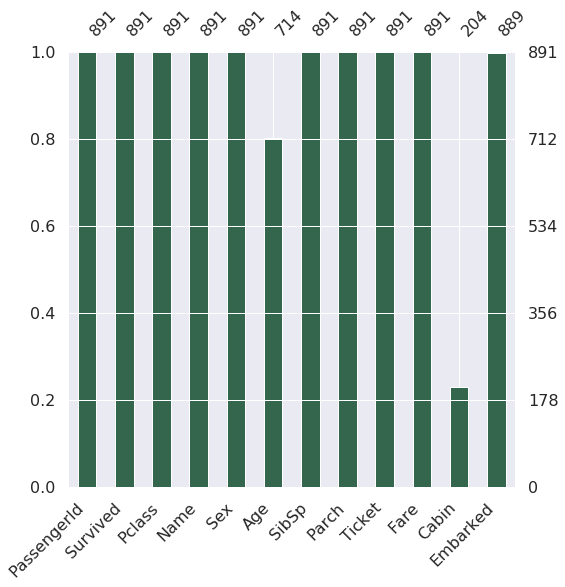

In [12]:
msno.bar(df=df_train.iloc[:,:], figsize=(8,8), color = (0.2, 0.4, 0.3))

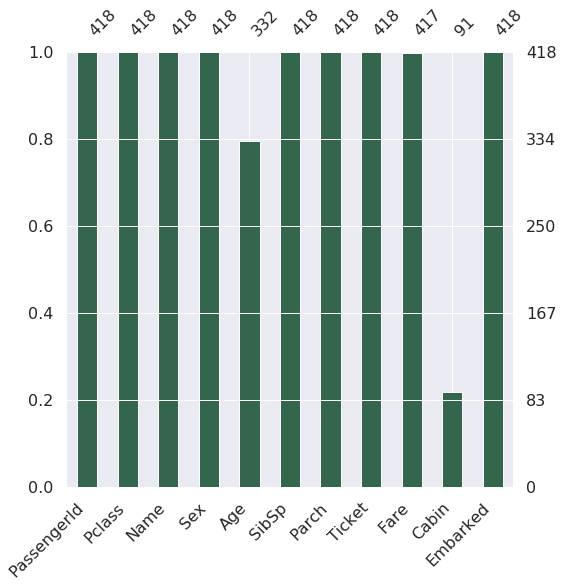

In [13]:
msno.bar(df=df_test.iloc[:,:], figsize=(8,8), color=(0.2, 0.4, 0.3))

1.2 Target label 확인

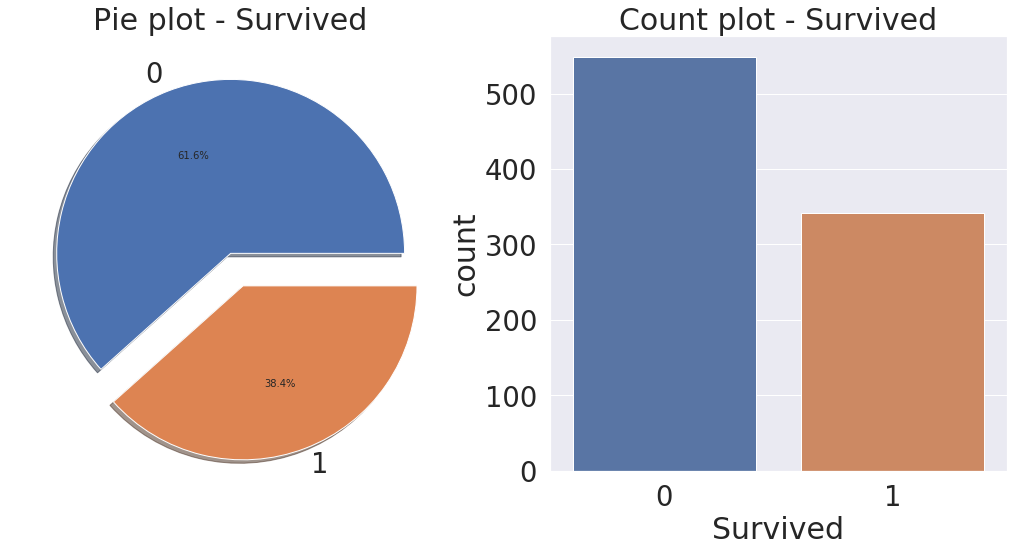

In [14]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.2], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

2. Exploratory Data Analysis

2.1 Pclass

In [17]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [19]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [20]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


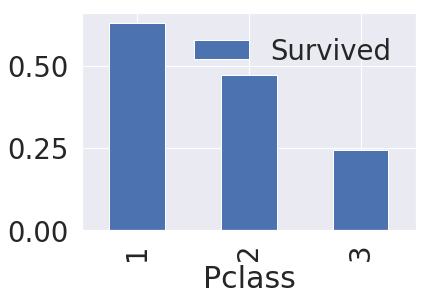

In [22]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', 
                                                                                      ascending=False).plot.bar()

In [23]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values

<bound method DataFrame.sort_values of         Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363>

In [24]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [25]:
df_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

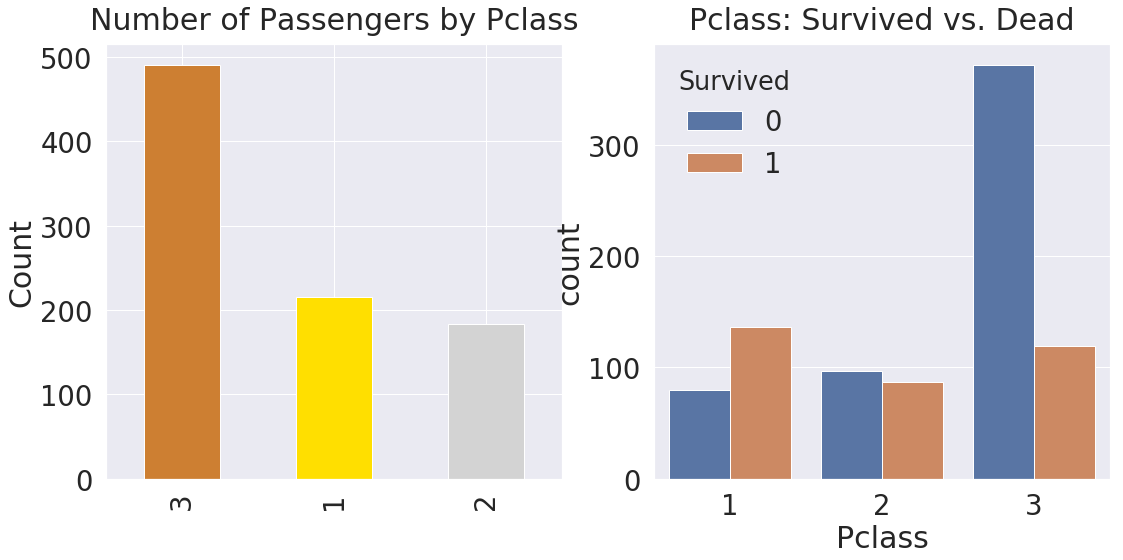

In [26]:
y_position = 1.02

f, ax = plt.subplots(1, 2, figsize=(18,8))

df_train['Pclass'].value_counts().plot.bar(color = ['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass', y=y_position)
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs. Dead', y=y_position)

plt.show()

2.2 Sex

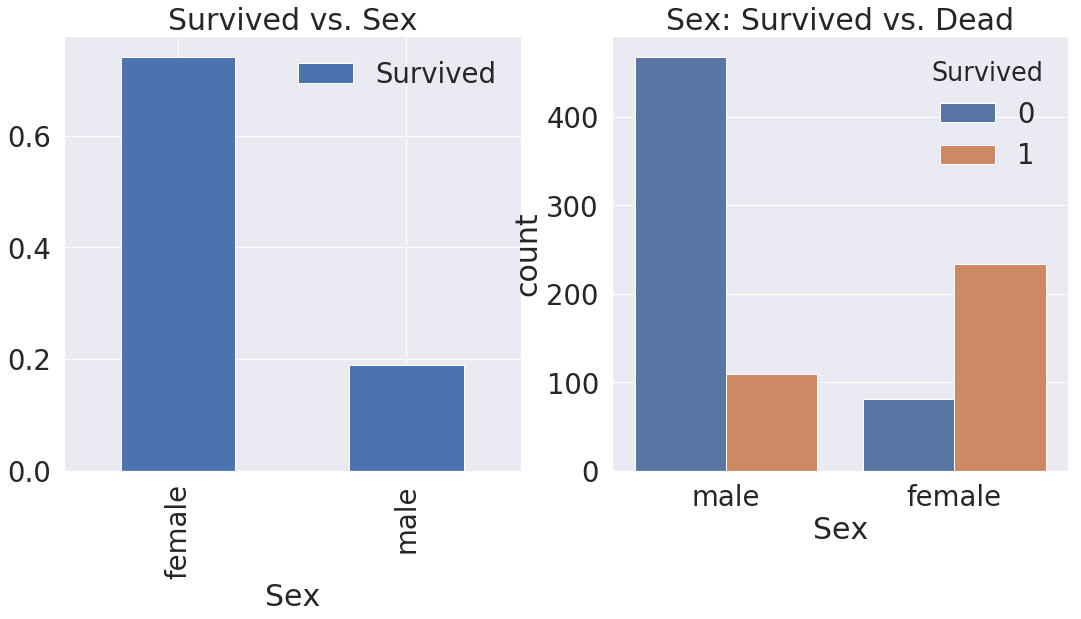

In [28]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs. Sex')

sns.countplot('Sex', hue='Survived', data= df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs. Dead')

plt.show()

In [29]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived',
                                                                                 ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [30]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


2.3 Both Sex and Pclass

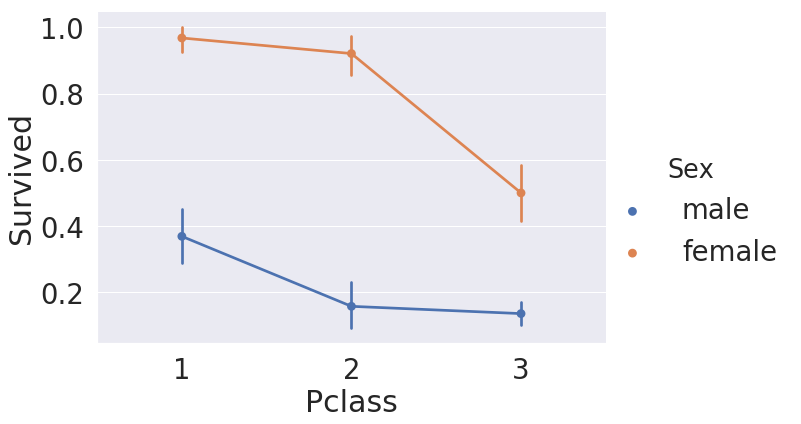

In [31]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train,
              size=6, aspect=1.5)

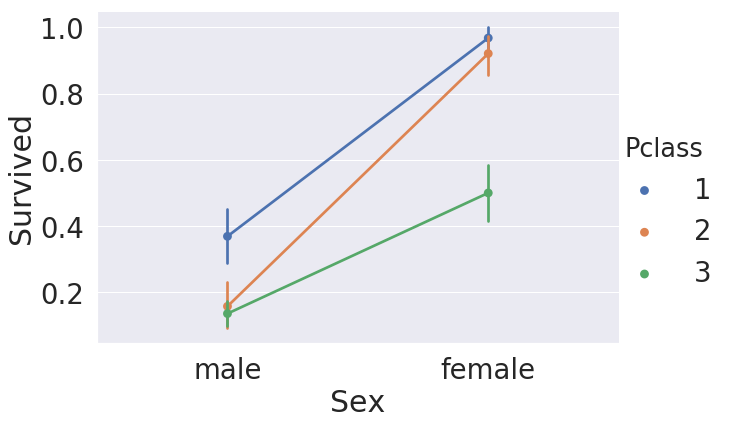

In [34]:
sns.factorplot('Sex', 'Survived', hue='Pclass', data=df_train,
              size=6, aspect=1.5)

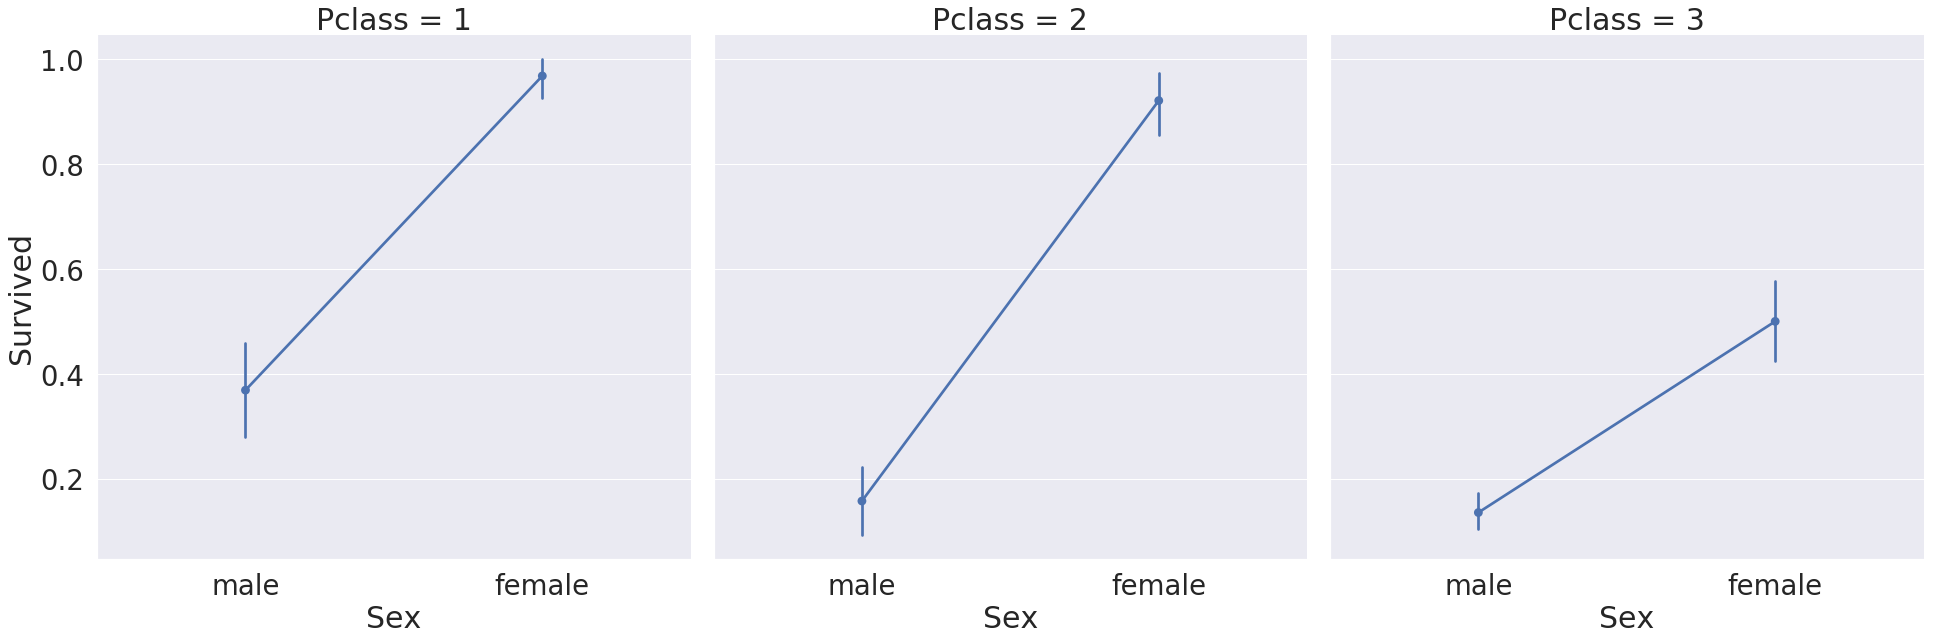

In [33]:
sns.factorplot(x='Sex', y='Survived', col='Pclass',
              data=df_train, satureation=0.5,
              size=9, aspect=1)

2.4 Age

In [35]:
print('제일 나이 많은 탑승객 : {:.1f}'.format(df_train['Age'].max()))
print('제일 나이 적은 탑승객 : {:.1f}'.format(df_train['Age'].min()))
print('탑승객 평균 나이: {:.1f}'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0
제일 나이 적은 탑승객 : 0.4
탑승객 평균 나이: 29.7


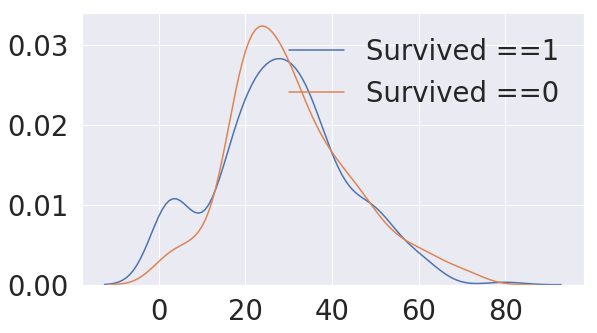

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(9,5))

sns.kdeplot(df_train[df_train['Survived']==1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'], ax=ax)

plt.legend(['Survived ==1', 'Survived ==0'])

plt.show()

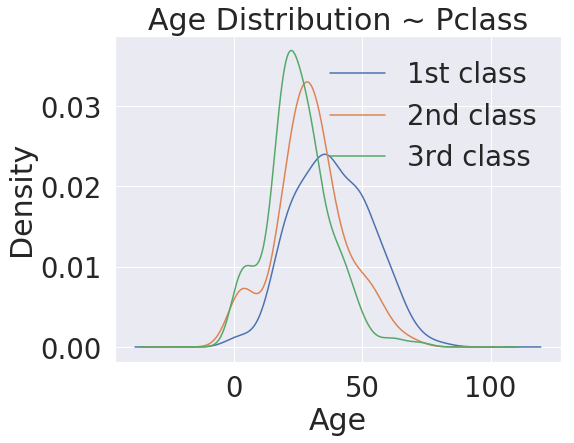

In [37]:
# Age distribution ~ Classes

plt.figure(figsize=(8,6))

df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution ~ Pclass')
plt.legend(['1st class', '2nd class', '3rd class'])

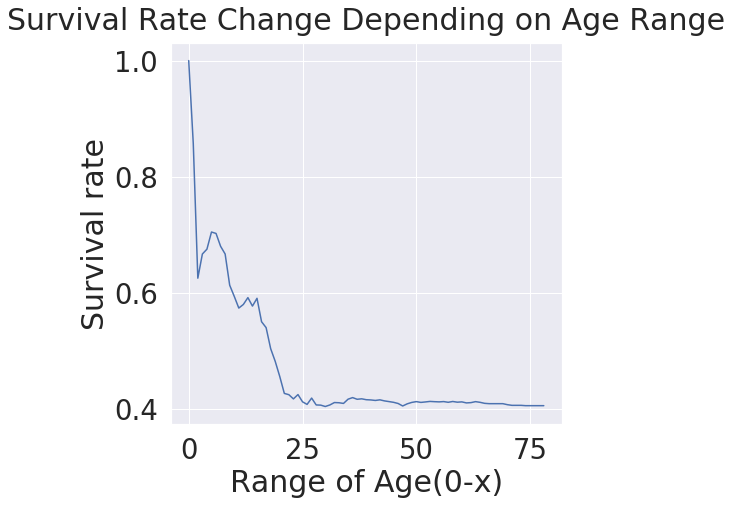

In [38]:
cummulate_survival_ratio = []

for i in range(1,80):
  cummulate_survival_ratio.append(df_train[df_train['Age'] <i]['Survived'].sum()/ len(df_train[df_train['Age']<i]['Survived']))
  
plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival Rate Change Depending on Age Range', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0-x)')

plt.show()

2.5 Pclass, Sex, Age

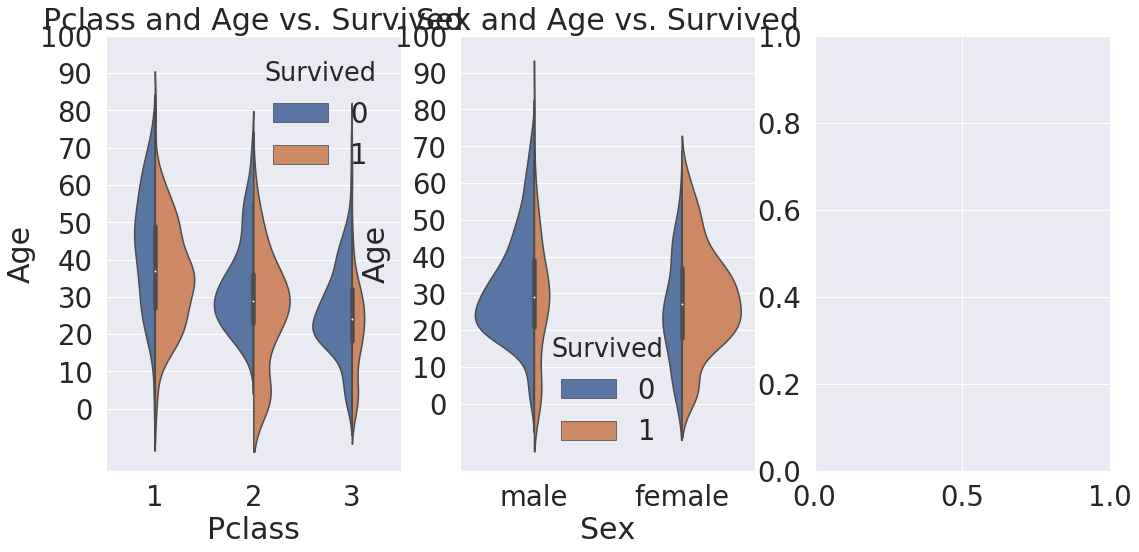

In [40]:
f, ax = plt.subplots(1,3,figsize=(18,8))

sns.violinplot('Pclass','Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs. Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot('Sex', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs. Survived')
ax[1].set_yticks(range(0,110,10))

plt.show()

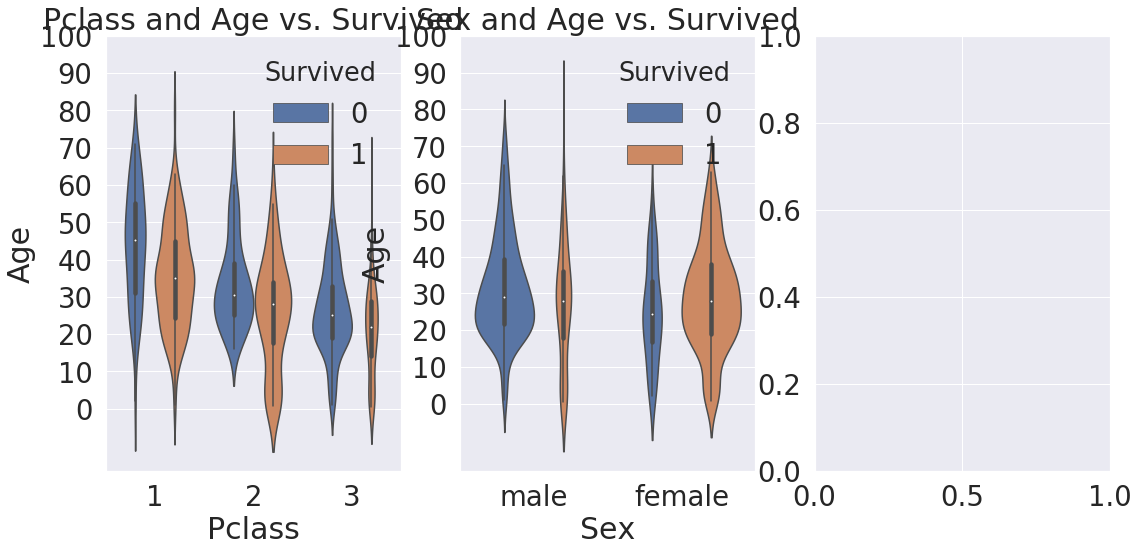

In [41]:
f, ax = plt.subplots(1,3,figsize=(18,8))

sns.violinplot('Pclass','Age', hue='Survived', data=df_train, scale='count', split=False, ax=ax[0])
ax[0].set_title('Pclass and Age vs. Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot('Sex', 'Age', hue='Survived', data=df_train, scale='count', split=False, ax=ax[1])
ax[1].set_title('Sex and Age vs. Survived')
ax[1].set_yticks(range(0,110,10))

plt.show()

2.6 Embarked

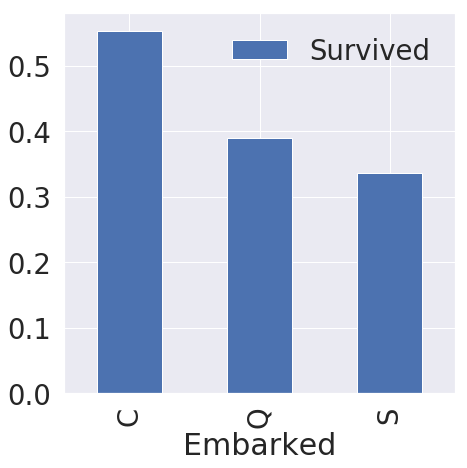

In [42]:
f, ax = plt.subplots(1,1,figsize=(7,7))

df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived',
                                                                                          ascending=False).plot.bar(ax=ax)

In [43]:
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values

<bound method DataFrame.sort_values of           Survived
Embarked          
C         0.553571
Q         0.389610
S         0.336957>

In [45]:
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


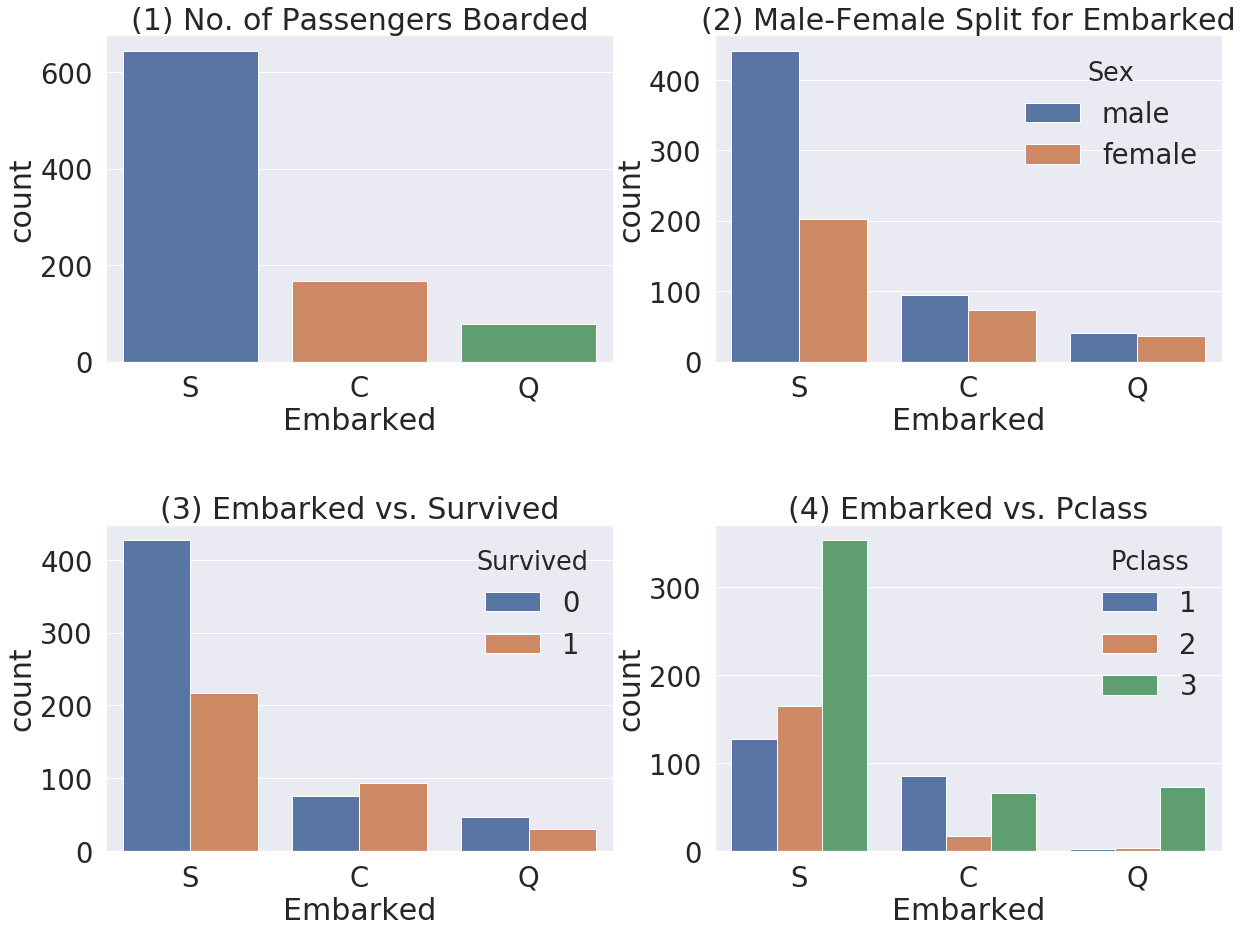

In [47]:
f, ax = plt.subplots(2,2, figsize=(20,15))

sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs. Survived')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs. Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

2.7 Family ~ SibSp + Parch

In [0]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] +1
df_test['FamilySize'] = df_test['SibSp'] +df_test['Parch'] +1

In [50]:
print('Maximum size of family: {}'.format(df_train['FamilySize'].max()))
print('Minimum size of family: {}'.format(df_train['FamilySize'].min()))
print('탑승객 가족 평균 사이즈: ', df_train['FamilySize'].mean())

Maximum size of family: 11
Minimum size of family: 1
탑승객 가족 평균 사이즈:  1.904601571268238


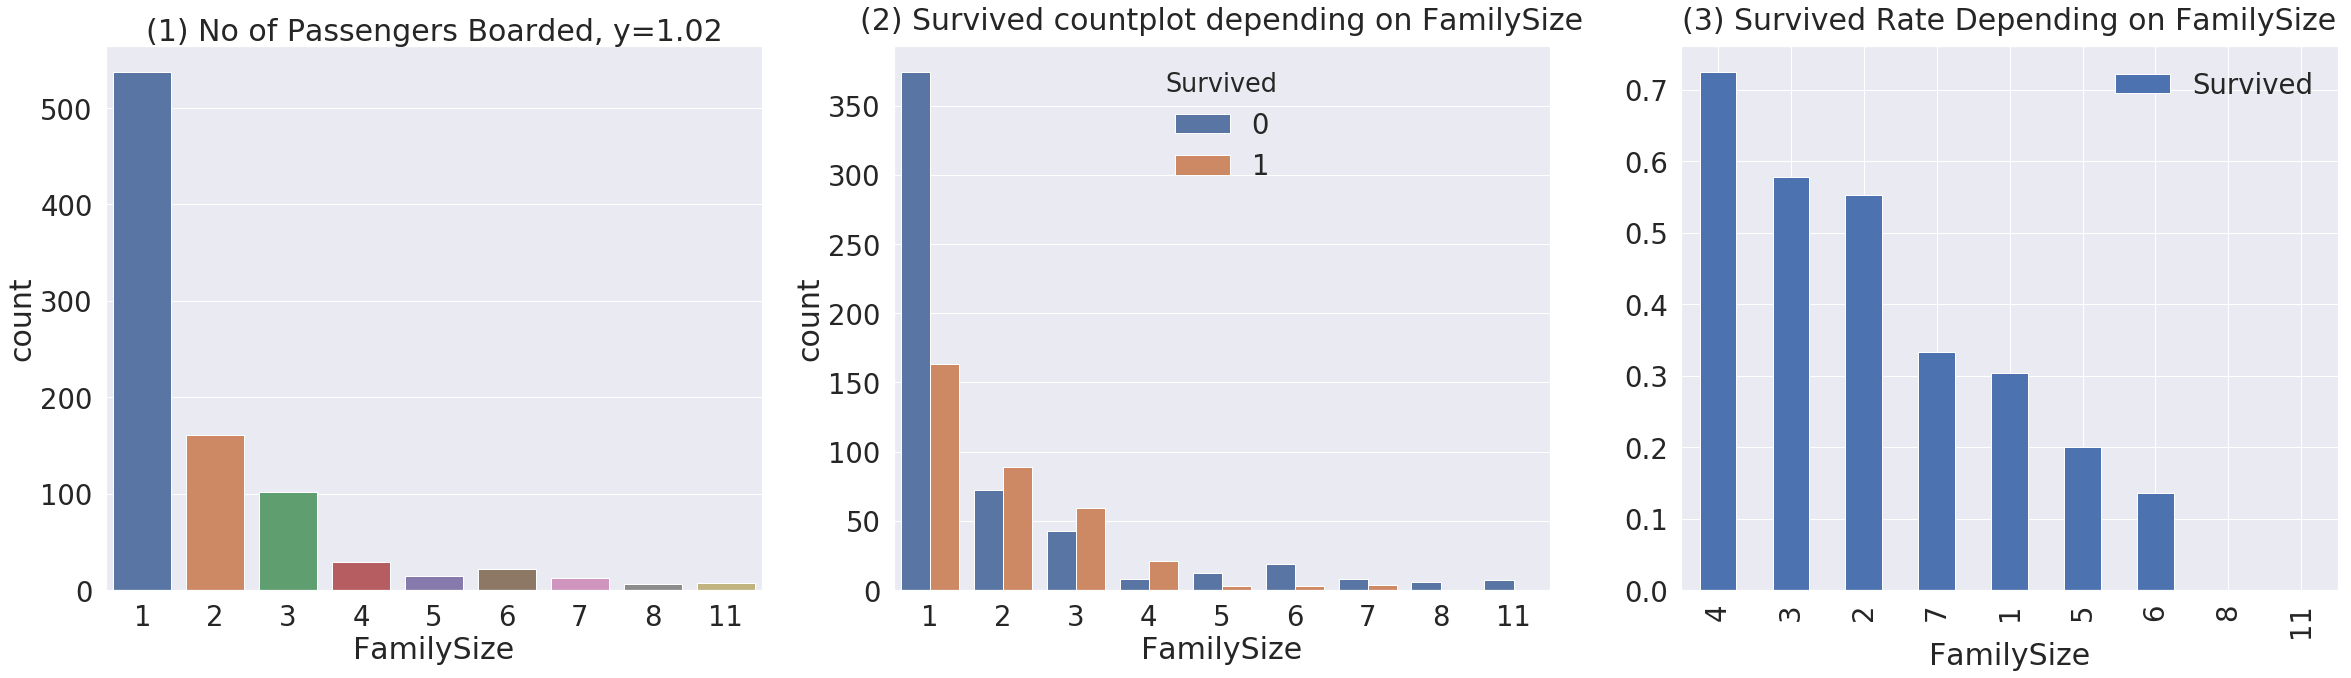

In [51]:
f, ax = plt.subplots(1,3, figsize=(40,10))

sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No of Passengers Boarded, y=1.02')

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived',
                                                                                              ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived Rate Depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


2.8 Fare

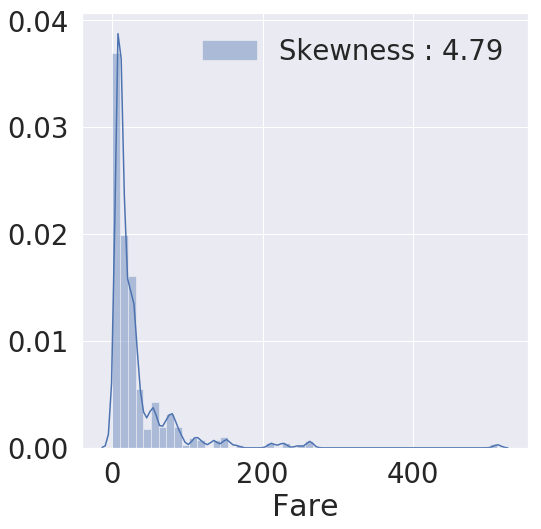

In [52]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
g=sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()),
              ax=ax)

g=g.legend(loc='best')

In [0]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i>0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i>0 else 0)

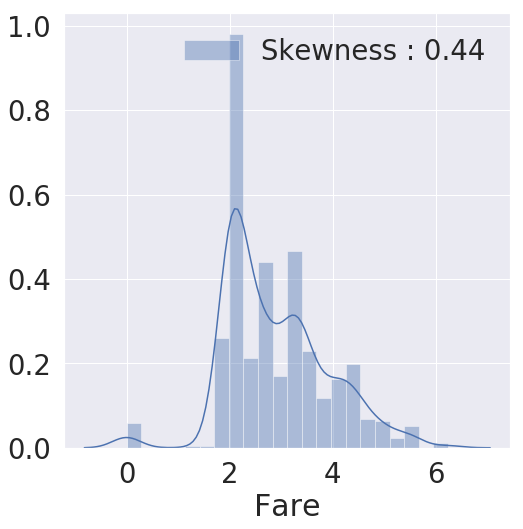

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))

g= sns.distplot(df_train['Fare'], color='b',
               label='Skewness : {:.2f}'.format(df_train['Fare'].skew(), ax=ax))

g = g.legend(loc='best')

2.9 Cabin

In [55]:
df_train['Cabin'].isnull().sum()

687

2.10 Ticket

In [57]:
df_train['Ticket'].value_counts()

CA. 2343             7
1601                 7
347082               7
347088               6
CA 2144              6
3101295              6
S.O.C. 14879         5
382652               5
PC 17757             4
113781               4
113760               4
W./C. 6608           4
4133                 4
19950                4
17421                4
349909               4
347077               4
LINE                 4
2666                 4
PC 17760             3
PC 17755             3
347742               3
239853               3
363291               3
371110               3
C.A. 31921           3
110413               3
230080               3
13502                3
248727               3
                    ..
PC 17603             1
2685                 1
27042                1
349241               1
19988                1
348121               1
243880               1
349257               1
2667                 1
SOTON/OQ 3101316     1
C 4001               1
244373               1
A/5. 3337  

In [58]:
from pandas import Series
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

3.1 Fill Null

In [0]:
# Salutation Extraction

df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')
df_test['Initial'] = df_test.Name.str.extract('([A-Za-z]+)\.')

In [61]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [63]:

list(df_train['Initial'].unique())

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Don',
 'Rev',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'Countess',
 'Jonkheer']

In [64]:
list(df_test['Initial'].unique())

['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona']

In [0]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                           ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'], inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [67]:
list(df_train['Initial'].unique()), list(df_test['Initial'].unique()), 

(['Mr', 'Mrs', 'Miss', 'Master', 'Other'],
 ['Mr', 'Mrs', 'Miss', 'Master', 'Other'])

In [68]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


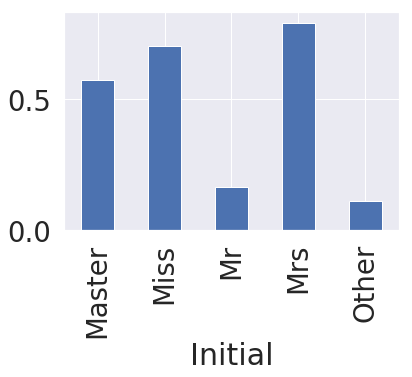

In [69]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

In [0]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46

3.1.2 Fill Null in Embarked

In [0]:
df_train['Embarked'].fillna('S', inplace = True)

3.2 Change Age (continuous to categorical)

In [0]:
df_train['Age_cat'] = 0
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[70 <= df_train['Age'], 'Age_cat'] = 7

df_test['Age_cat'] = 0
df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[70 <= df_test['Age'], 'Age_cat'] = 7

In [0]:
# 다른 방법 by using apply method

def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7  
      
df_train['Age_cat_2'] = df_train['Age'].apply(category_age)

In [75]:
print('1번 방법, 2번 방법 둘 다 같은 결과이면 True를 보여줌 -> ',
      (df_train['Age_cat'] == df_train['Age_cat_2']).all())

1번 방법, 2번 방법 둘 다 같은 결과이면 True를 보여줌 ->  True


In [0]:
df_train.drop(['Age', 'Age_cat_2'], axis=1, inplace=True)
df_test.drop(['Age'], axis=1, inplace = True)

In [77]:
list(df_train.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'FamilySize',
 'Initial',
 'Age_cat']

In [78]:
list(df_test.columns)

['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'FamilySize',
 'Initial',
 'Age_cat']

3.3 Change Initial, Embarked and Sex
(string to numerical)

In [0]:
df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss':1, 'Mr':2, "Mrs":3, 'Other':4})
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss':1, 'Mr':2, "Mrs":3, 'Other':4})

In [81]:
df_train['Initial'].unique()

array([2, 3, 1, 0, 4])

In [82]:
df_test['Initial'].unique()

array([2, 3, 1, 0, 4])

In [83]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [84]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [0]:
df_train['Embarked'] = df_train['Embarked'].map({'C':0, "Q":1, "S":2})
df_test['Embarked'] = df_test['Embarked'].map({'C':0, "Q":1, "S":2})

In [86]:
df_train['Embarked'].isnull().any()

False

In [0]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female':0, 'male':1})

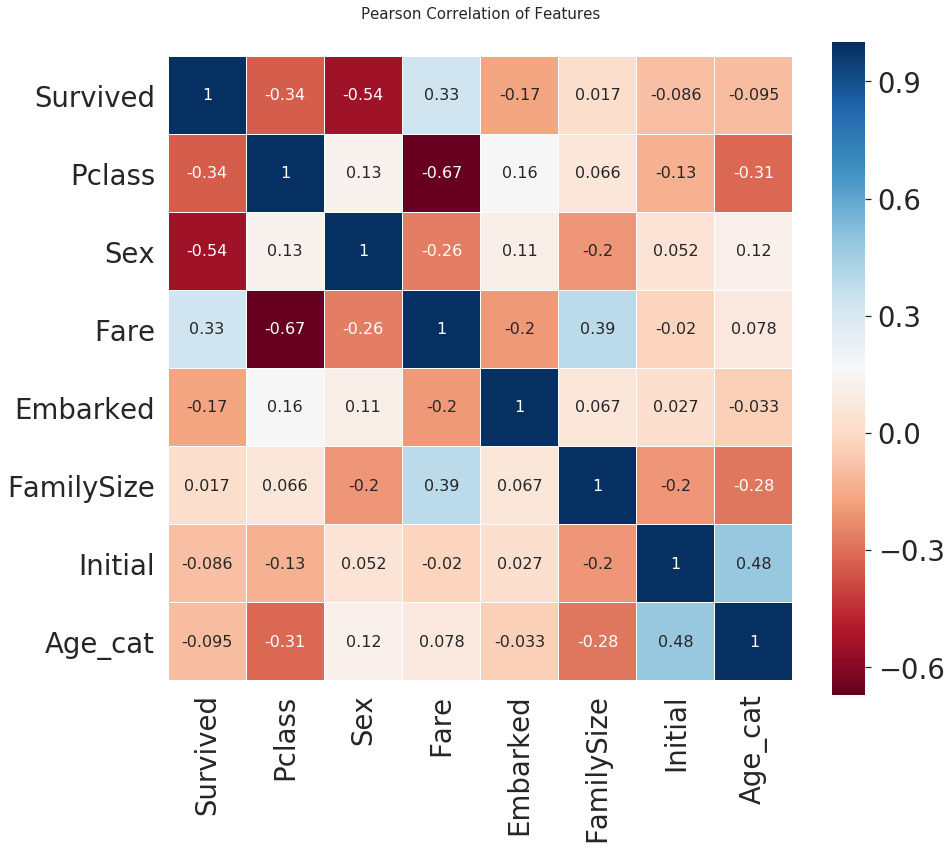

In [88]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize',
                        'Initial', 'Age_cat']]

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)

sns.heatmap(heatmap_data.astype(float).corr(), linewidth=0.1, vmax=1.0,
           square = True, cmap=colormap,
           linecolor='white', annot=True, annot_kws={'size':16})

del heatmap_data

3.4 One-hot encoding on Initial and Embarked

In [0]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [90]:
list(df_train), list(df_test)

(['PassengerId',
  'Survived',
  'Pclass',
  'Name',
  'Sex',
  'SibSp',
  'Parch',
  'Ticket',
  'Fare',
  'Cabin',
  'Embarked',
  'FamilySize',
  'Age_cat',
  'Initial_0',
  'Initial_1',
  'Initial_2',
  'Initial_3',
  'Initial_4'],
 ['PassengerId',
  'Pclass',
  'Name',
  'Sex',
  'SibSp',
  'Parch',
  'Ticket',
  'Fare',
  'Cabin',
  'Embarked',
  'FamilySize',
  'Age_cat',
  'Initial_0',
  'Initial_1',
  'Initial_2',
  'Initial_3',
  'Initial_4'])

In [92]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

KeyError: ignored

In [93]:
list(df_train), list(df_test)

(['PassengerId',
  'Survived',
  'Pclass',
  'Name',
  'Sex',
  'SibSp',
  'Parch',
  'Ticket',
  'Fare',
  'Cabin',
  'FamilySize',
  'Age_cat',
  'Initial_0',
  'Initial_1',
  'Initial_2',
  'Initial_3',
  'Initial_4',
  'Embarked_0',
  'Embarked_1',
  'Embarked_2'],
 ['PassengerId',
  'Pclass',
  'Name',
  'Sex',
  'SibSp',
  'Parch',
  'Ticket',
  'Fare',
  'Cabin',
  'FamilySize',
  'Age_cat',
  'Initial_0',
  'Initial_1',
  'Initial_2',
  'Initial_3',
  'Initial_4',
  'Embarked_0',
  'Embarked_1',
  'Embarked_2'])

3.5 Drop columns

In [0]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'],
             axis=1, inplace = True)

df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'],
            axis=1, inplace = True)

In [96]:
len(list(df_train)), len(list(df_test))

(14, 13)

4. Building Machine Learning Model & Prediction Using Training Model

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

4.1, Preparation: Split Dataset into Train/Valid Testset 

In [0]:
X_train = df_train.drop(['Survived'], axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [0]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=2019)

4.2 Model Generation and Prediction

In [0]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [103]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 
                                          100*metrics.accuracy_score(prediction, y_vld)))

총 268명 중 83.21% 정확도로 생존을 맞춤


4.3 Feature Importance

In [0]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

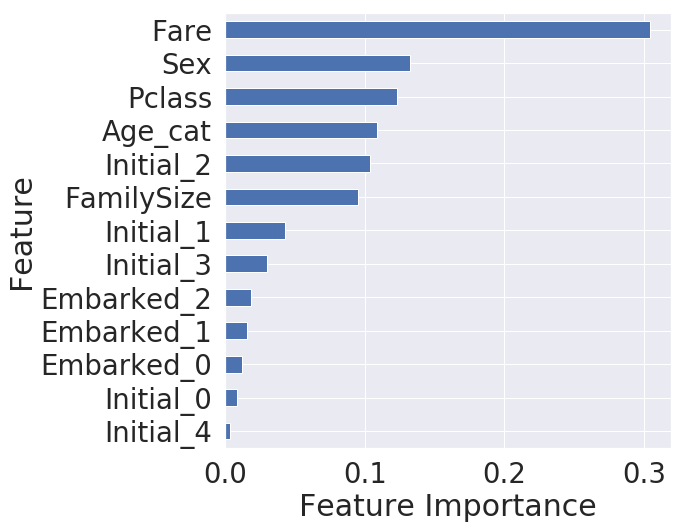

In [106]:
plt.figure(figsize=(8,8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [107]:
Series_feat_imp.sort_values

<bound method Series.sort_values of Pclass        0.123179
Sex           0.132495
Fare          0.304475
FamilySize    0.095024
Age_cat       0.109158
Initial_0     0.008784
Initial_1     0.043223
Initial_2     0.103603
Initial_3     0.030363
Initial_4     0.003336
Embarked_0    0.012123
Embarked_1    0.015425
Embarked_2    0.018813
dtype: float64>